# Title : Analyzing Air Quality Index (AQI) Trends in a City

In [25]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.impute import SimpleImputer
import warnings 

In [26]:
# Supressing update warnings
warnings.filterwarnings('ignore') 

In [27]:
data = pd.read_csv("./datasets/data.csv", encoding="cp1252") 
data

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
435737,SAMP,24-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.0,50.0,143.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-24
435738,SAMP,29-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.0,46.0,171.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-29
435739,NaN,NaN,andaman-and-nicobar-islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435740,NaN,NaN,Lakshadweep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
dtyp

In [29]:
# Cleaning up name changes
data.state = data.state.replace({'Uttaranchal':'Uttarakhand'}) 
data.state[data.location == "Jamshedpur"] = data.state[data.location == 'Jamshedpur'].replace({"Bihar":"Jharkhand"})

In [30]:
# Changing types to uniform format
types = {
    "Residential": "R", 
    "Residential and others": "RO",
    "Residential, Rural and other Areas": "RRO", 
    "Industrial Area": "I",
    "Industrial Areas": "I", 
    "Industrial": "I", 
    "Sensitive Area": "S", 
    "Sensitive Areas": "S", 
    "Sensitive": "S", 
    np.nan: "RRO"
}

data.type = data.type.replace(types) 
data.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,RRO,4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,I,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,RRO,6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,RRO,6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,I,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [31]:
# defining columns of importance, which shall be used reguarly 
VALUE_COLS = ['so2', 'no2', 'rspm', 'spm', 'pm2_5']

In [32]:
# invoking SimpleImputer to fill missing values
imputer = SimpleImputer(missing_values=np.nan, strategy='mean') 
data[VALUE_COLS] = imputer.fit_transform(data[VALUE_COLS])

In [33]:
# checking to see if the dataset has any null values left over and the format 
print(data.isnull().sum())
data.tail()

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                                0
so2                                 0
no2                                 0
rspm                                0
spm                                 0
location_monitoring_station     27491
pm2_5                               0
date                                7
dtype: int64


,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
435737,SAMP,24-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.000000,50.000000,143.000000,220.78348,"Inside Rampal Industries,ULUBERIA",40.791467,2015-12-24
435738,SAMP,29-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.000000,46.000000,171.000000,220.78348,"Inside Rampal Industries,ULUBERIA",40.791467,2015-12-29
435739,NaN,NaN,andaman-and-nicobar-islands,NaN,NaN,RRO,10.829414,25.809623,108.832784,220.78348,NaN,40.791467,NaN
435740,NaN,NaN,Lakshadweep,NaN,NaN,RRO,10.829414,25.809623,108.832784,220.78348,NaN,40.791467,NaN
435741,NaN,NaN,Tripura,NaN,NaN,RRO,10.829414,25.809623,108.832784,220.78348,NaN,40.791467,NaN


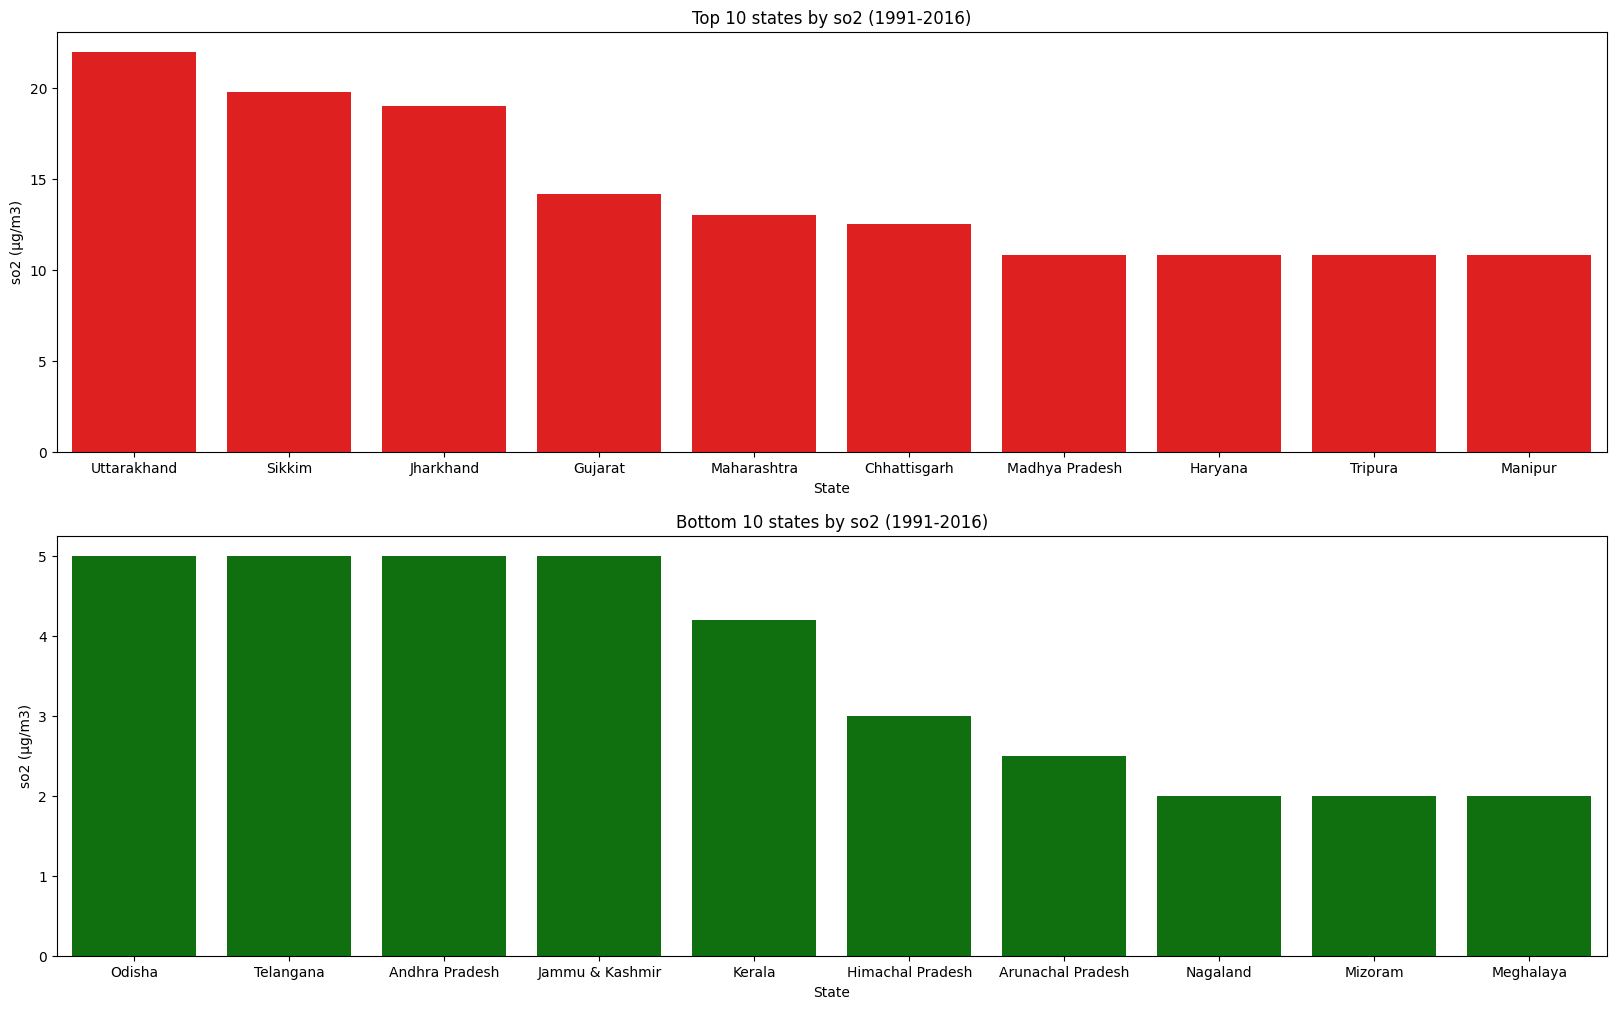

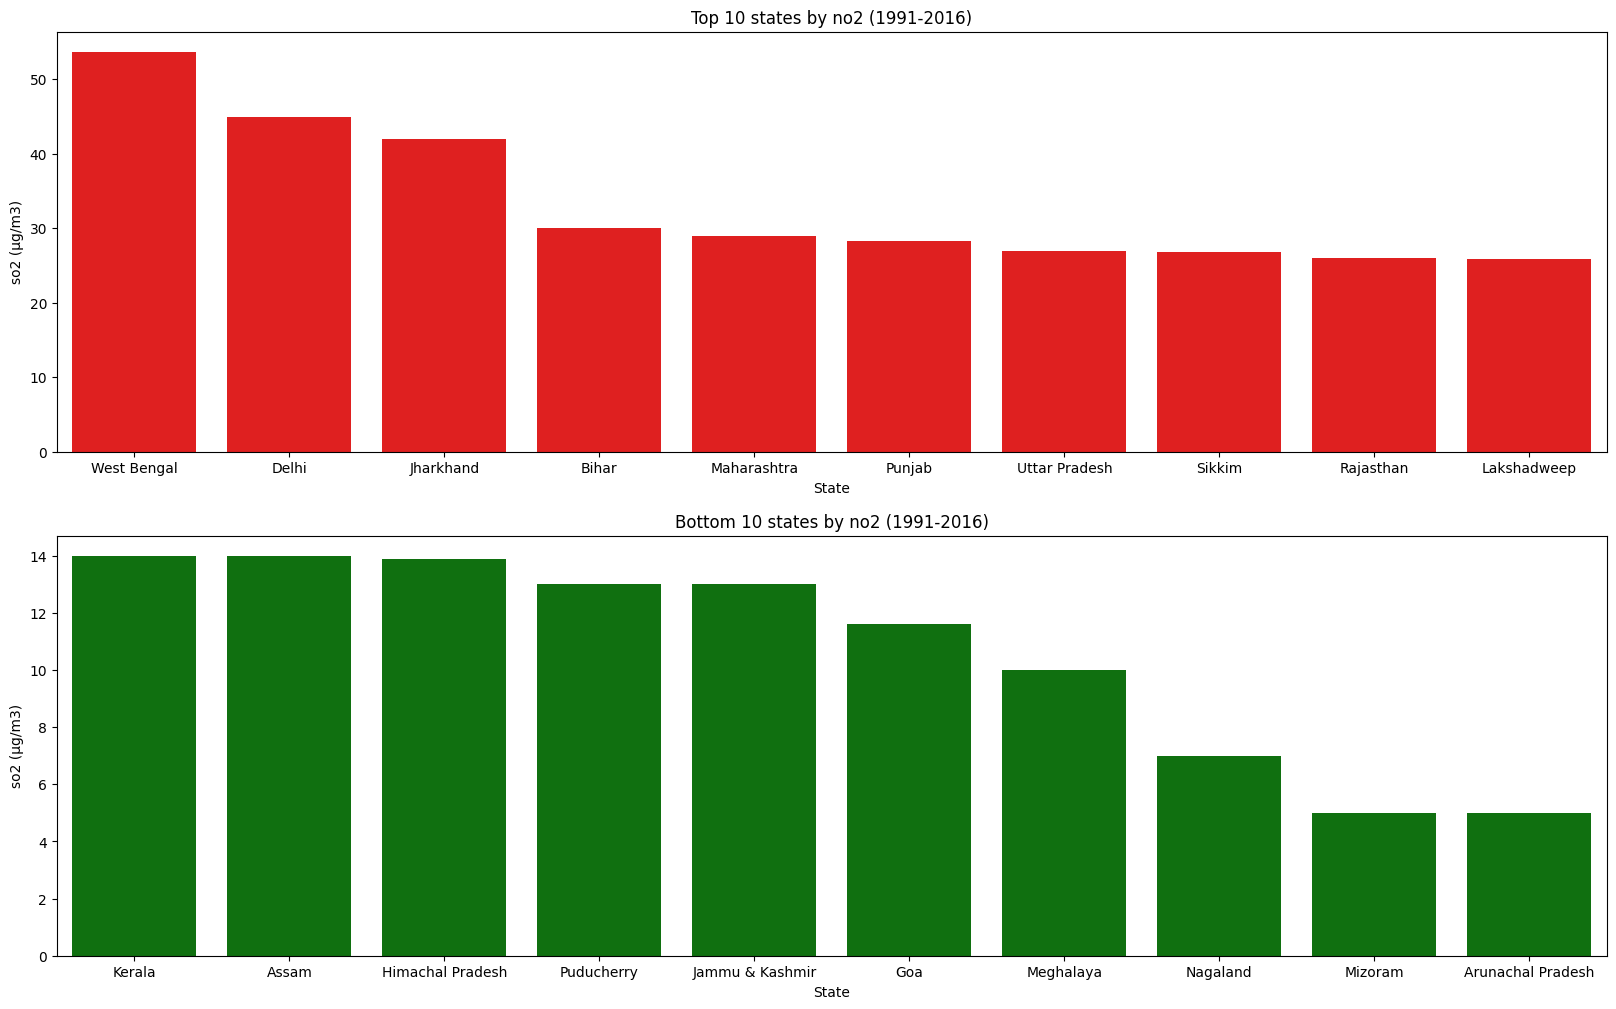

In [34]:
# Plotting highest and lowest ranking states
# defining a function to find and plot the top 10 and bottom 10 states for a given indicator (defaults to SO2) 
def top_and_bottom_10_states(indicator="so2"):
    fig, ax = plt.subplots(2,1, figsize=(20, 12))
    ind = data[[indicator, 'state']].groupby('state', as_index=False).median().sort_values(by=indicator,ascending=False)
    top10 = sns.barplot(x='state', y=indicator, data=ind[:10], ax=ax[0], color='red') 
    top10.set_title("Top 10 states by {} (1991-2016)".format(indicator)) 
    top10.set_ylabel("so2 (µg/m3)")
    top10.set_xlabel("State")
    bottom10 = sns.barplot(x='state', y=indicator, data=ind[-10:], ax=ax[1], color='green') 
    bottom10.set_title("Bottom 10 states by {} (1991-2016)".format(indicator)) 
    bottom10.set_ylabel("so2 (µg/m3)")
    bottom10.set_xlabel("State") 

top_and_bottom_10_states("so2") 
top_and_bottom_10_states("no2")

In [35]:
def highest_levels_recorded(indicator="so2"): 
    plt.figure(figsize=(20,10))
    
    # Convert the indicator column to numeric, coercing errors into NaN
    data[indicator] = pd.to_numeric(data[indicator], errors='coerce')
    
    # Now group by 'state' and compute the max for each state
    ind = data[[indicator, 'location', 'state', 'date']].groupby('state', as_index=False).max() 

    highest = sns.barplot(x='state', y=indicator, data=ind)
    highest.set_title(f"Highest ever {indicator} levels recorded by state")
    plt.xticks(rotation=90) 
    plt.show()


In [40]:
# Plotting pollutant average by type
# defining a function to plot pollutant averages by type for a given indicator 
def type_avg(indicator=""):
    type_avg = data[VALUE_COLS + ['type', 'date']].groupby("type").mean() 
    if not indicator:
        t = type_avg[indicator].plot(kind='bar') 
        plt.xticks(rotation = 0)
        plt.title("Pollutant average by type for {}".format(indicator)) 
    else:
        t = type_avg.plot(kind='bar') 
        plt.xticks(rotation = 0) 
        plt.title("Pollutant average by type")

type_avg('so2')

TypeError: agg function failed [how->mean,dtype->object]

In [ ]:
# Plotting pollutant averages by locations/state
# defining a function to plot pollutant averages for a given indicator (defaults to SO2) by locations in a given state 
def location_avgs(state, indicator="so2"):
    locs = data[VALUE_COLS + ['state', 'location', 'date']].groupby(['state', 'location']).mean() 
    state_avgs = locs.loc[state].reset_index()
    sns.barplot(x='location', y=indicator, data=state_avgs) 
    plt.title("Location-wise average for {} in {}".format(indicator, state)) 
    plt.xticks(rotation = 90)

location_avgs("Bihar", "no2")

In [ ]:
# Sure! Here's a line-by-line explanation of your code for analyzing air quality index (AQI) trends in a city:

# ### 1. Importing Libraries
# ```python
# import numpy as np 
# import pandas as pd
# import matplotlib.pyplot as plt 
# import seaborn as sns
# from sklearn.impute import SimpleImputer
# import warnings 
# ```
# - `numpy`: Used for handling numerical operations (like `np.nan` for missing data).
# - `pandas`: Library for data manipulation and analysis (used for reading and processing the dataset).
# - `matplotlib.pyplot`: Used for creating static visualizations like plots.
# - `seaborn`: Builds on `matplotlib` for more attractive and informative statistical plots.
# - `SimpleImputer`: Part of `sklearn` for filling missing values in the dataset.
# - `warnings`: Allows the suppression of warnings (for cleaner output).

# ### 2. Suppressing Warnings
# ```python
# warnings.filterwarnings('ignore')
# ```
# - This line suppresses warnings to prevent irrelevant or noisy messages from appearing during execution.

# ### 3. Loading the Dataset
# ```python
# data = pd.read_csv("./datasets/data.csv", encoding="cp1252")
# ```
# - Reads a CSV file (`data.csv`) into a `pandas` DataFrame. The file is encoded using `cp1252` to handle special characters in the data properly.

# ### 4. Viewing the Data
# ```python
# data
# ```
# - Displays the first few rows of the dataset to understand its structure.

# ### 5. Displaying Information about the Data
# ```python
# data.info()
# ```
# - Provides a summary of the dataset: the number of rows, columns, data types, and number of non-null values.

# ### 6. Cleaning Data
# ```python
# data.state = data.state.replace({'Uttaranchal':'Uttarakhand'})
# data.state[data.location == "Jamshedpur"] = data.state[data.location == 'Jamshedpur'].replace({"Bihar":"Jharkhand"})
# ```
# - `data.state.replace(...)`: Updates the values in the `state` column by replacing `'Uttaranchal'` with `'Uttarakhand'`.
# - The second line updates the state for rows where the location is `'Jamshedpur'` and the state is `'Bihar'`, changing it to `'Jharkhand'`.

# ### 7. Cleaning Column Types
# ```python
# types = {
#     "Residential": "R", 
#     "Residential and others": "RO",
#     "Residential, Rural and other Areas": "RRO", 
#     "Industrial Area": "I",
#     "Industrial Areas": "I", 
#     "Industrial": "I", 
#     "Sensitive Area": "S", 
#     "Sensitive Areas": "S", 
#     "Sensitive": "S", 
#     np.nan: "RRO"
# }
# data.type = data.type.replace(types)
# ```
# - This replaces various strings in the `type` column with standardized short codes (e.g., `"Residential"` becomes `"R"`). Missing values (`np.nan`) are assigned `"RRO"`.

# ### 8. Defining Important Columns
# ```python
# VALUE_COLS = ['so2', 'no2', 'rspm', 'spm', 'pm2_5']
# ```
# - A list of column names that represent air quality indicators (`so2`, `no2`, `rspm`, `spm`, `pm2_5`) to be used in further analysis.

# ### 9. Handling Missing Data
# ```python
# imputer = SimpleImputer(missing_values=np.nan, strategy='mean') 
# data[VALUE_COLS] = imputer.fit_transform(data[VALUE_COLS])
# ```
# - `SimpleImputer`: Creates an imputer that fills missing values (`np.nan`) with the mean of the respective column.
# - The `fit_transform()` method applies this imputation strategy on the `VALUE_COLS` (air quality indicators).

# ### 10. Checking for Remaining Missing Data
# ```python
# print(data.isnull().sum())
# ```
# - Displays the count of missing values (`NaN`) in each column after imputation.

# ### 11. Plotting Top and Bottom 10 States for a Given Indicator
# ```python
# def top_and_bottom_10_states(indicator="so2"):
#     fig, ax = plt.subplots(2,1, figsize=(20, 12))
#     ind = data[[indicator, 'state']].groupby('state', as_index=False).median().sort_values(by=indicator,ascending=False)
#     top10 = sns.barplot(x='state', y=indicator, data=ind[:10], ax=ax[0], color='red') 
#     top10.set_title("Top 10 states by {} (1991-2016)".format(indicator)) 
#     top10.set_ylabel("{} (µg/m3)".format(indicator))
#     top10.set_xlabel("State")
#     bottom10 = sns.barplot(x='state', y=indicator, data=ind[-10:], ax=ax[1], color='green') 
#     bottom10.set_title("Bottom 10 states by {} (1991-2016)".format(indicator)) 
#     bottom10.set_ylabel("{} (µg/m3)".format(indicator))
#     bottom10.set_xlabel("State") 

# top_and_bottom_10_states("so2") 
# top_and_bottom_10_states("no2")
# ```
# - **Function Purpose**: This function plots the top and bottom 10 states based on a given pollutant (default is `so2`).
# - `groupby('state')`: Groups the data by `state` and calculates the median of the pollutant in each state.
# - `sns.barplot`: Creates bar plots for the top 10 and bottom 10 states based on the pollutant levels, with distinct colors for each plot.
# - The function is called twice: first for `so2`, then for `no2`.

# ### 12. Plotting the Highest Ever Recorded Levels
# ```python
# def highest_levels_recorded(indicator="so2"):
#     plt.figure(figsize=(20,10))
#     ind = data[[indicator, 'location', 'state', 'date']].groupby('state', as_index=False).max() 
#     highest = sns.barplot(x='state', y=indicator, data=ind)
#     highest.set_title("Highest ever {} levels recorded by state".format(indicator))
#     plt.xticks(rotation=90) 

# highest_levels_recorded("no2") 
# highest_levels_recorded("rspm")
# ```
# - **Function Purpose**: This function plots the highest ever recorded levels of a given pollutant by state.
# - `groupby('state').max()`: Groups data by `state` and finds the maximum value for each state for the chosen pollutant.
# - The plots are generated for `no2` and `rspm` pollutants.

# ### 13. Plotting Pollutant Averages by Type
# ```python
# def type_avg(indicator=""):
#     type_avg = data[VALUE_COLS + ['type', 'date']].groupby("type").mean() 
#     if not indicator:
#         t = type_avg[indicator].plot(kind='bar') 
#         plt.xticks(rotation = 0)
#         plt.title("Pollutant average by type for {}".format(indicator)) 
#     else:
#         t = type_avg.plot(kind='bar') 
#         plt.xticks(rotation = 0) 
#         plt.title("Pollutant average by type")

# type_avg('so2')
# ```
# - **Function Purpose**: This function plots the average pollutant levels by type (Residential, Industrial, etc.).
# - It groups data by `type`, calculates the mean for each pollutant, and plots the results using a bar chart.
# - The function is called for `so2` to visualize the average `so2` levels by `type`.

# ### 14. Plotting Pollutant Averages by Location/State
# ```python
# def location_avgs(state, indicator="so2"):
#     locs = data[VALUE_COLS + ['state', 'location', 'date']].groupby(['state', 'location']).mean() 
#     state_avgs = locs.loc[state].reset_index()
#     sns.barplot(x='location', y=indicator, data=state_avgs) 
#     plt.title("Location-wise average for {} in {}".format(indicator, state)) 
#     plt.xticks(rotation = 90)

# location_avgs("Bihar", "no2")
# ```
# - **Function Purpose**: This function plots pollutant averages by location within a specified state.
# - It groups the data by both `state` and `location`, then calculates the mean values for the pollutants.
# - The function is called for `no2` in the state of `Bihar` to show location-wise averages.

# ### Summary
# The code processes and visualizes air quality data, including:
# - Handling missing values.
# - Cleaning data for consistency.
# - Plotting trends for various air pollutants (`so2`, `no2`, etc.) by state, location, and type.
# - Visualizing the highest recorded pollutant levels.


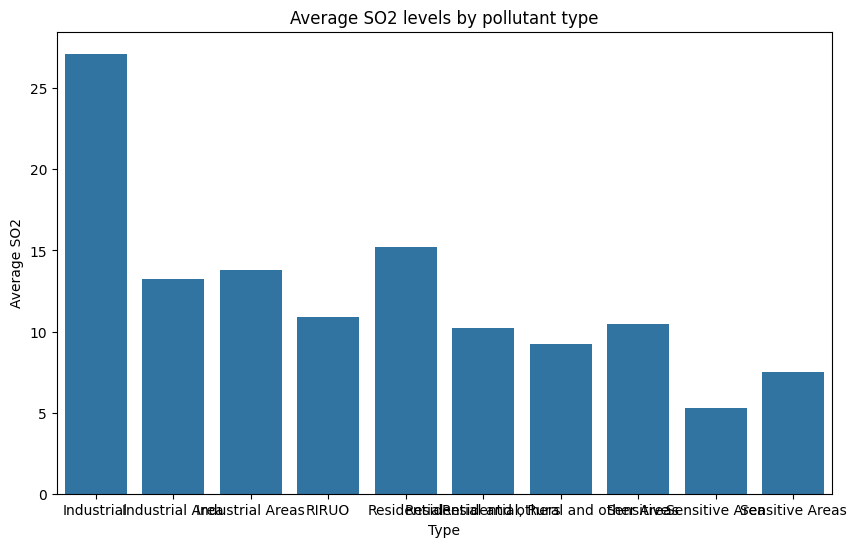

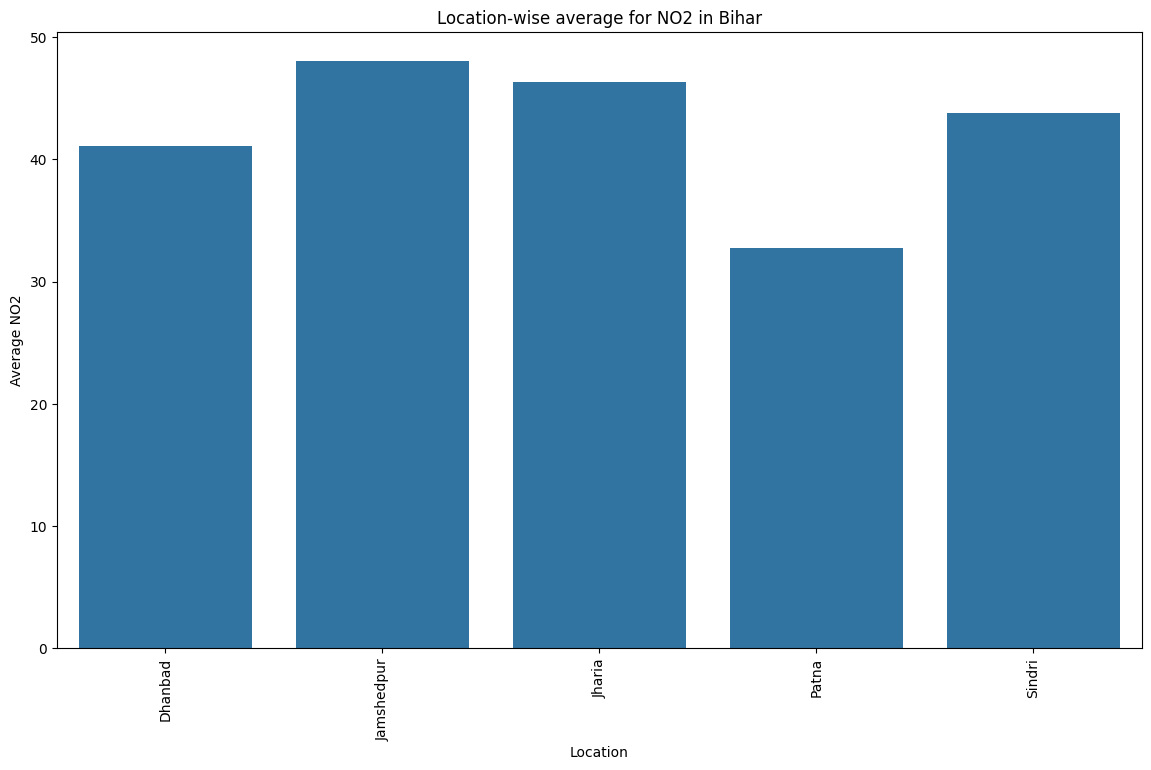

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Columns in your data that contain pollutant values
VALUE_COLS = ['so2', 'no2', 'rspm', 'spm', 'pm2_5']

# Load your dataset (replace 'data.csv' with your actual data file)
data = pd.read_csv("./datasets/data.csv", encoding="cp1252") 
data

# Ensure 'type' and 'date' columns are in the dataset; otherwise, handle their absence accordingly
if 'type' not in data.columns or 'date' not in data.columns:
    print("Data does not contain 'type' or 'date' columns as expected.")

# Define function to plot average pollutant levels by type
def type_avg(indicator="so2"):
    # Select only numeric columns, then group and calculate the mean
    type_avg = data[VALUE_COLS + ['type']].groupby("type").mean(numeric_only=True)
    if indicator in type_avg.columns:
        plt.figure(figsize=(10, 6))
        sns.barplot(x=type_avg.index, y=type_avg[indicator])
        plt.xlabel("Type")
        plt.ylabel("Average " + indicator.upper())
        plt.xticks(rotation=0)
        plt.title(f"Average {indicator.upper()} levels by pollutant type")
        plt.show()
    else:
        print(f"Indicator '{indicator}' not found in data columns.")

# Call the function with the desired indicator, e.g., 'so2'
type_avg('so2')

# Define function to plot location-wise average for a given pollutant in a specified state
def location_avgs(state, indicator="so2"):
    # Filter by numeric columns and calculate mean for each location in the specified state
    locs = data[VALUE_COLS + ['state', 'location']].groupby(['state', 'location']).mean(numeric_only=True)
    if state in locs.index.get_level_values('state'):
        state_avgs = locs.loc[state].reset_index()
        if indicator in state_avgs.columns:
            plt.figure(figsize=(14, 8))
            sns.barplot(x='location', y=indicator, data=state_avgs)
            plt.xlabel("Location")
            plt.ylabel("Average " + indicator.upper())
            plt.title(f"Location-wise average for {indicator.upper()} in {state}")
            plt.xticks(rotation=90)
            plt.show()
        else:
            print(f"Indicator '{indicator}' not found in data columns.")
    else:
        print(f"State '{state}' not found in data.")

# Call the function with the desired state and indicator, e.g., 'Bihar' and 'no2'
location_avgs("Bihar", "no2")


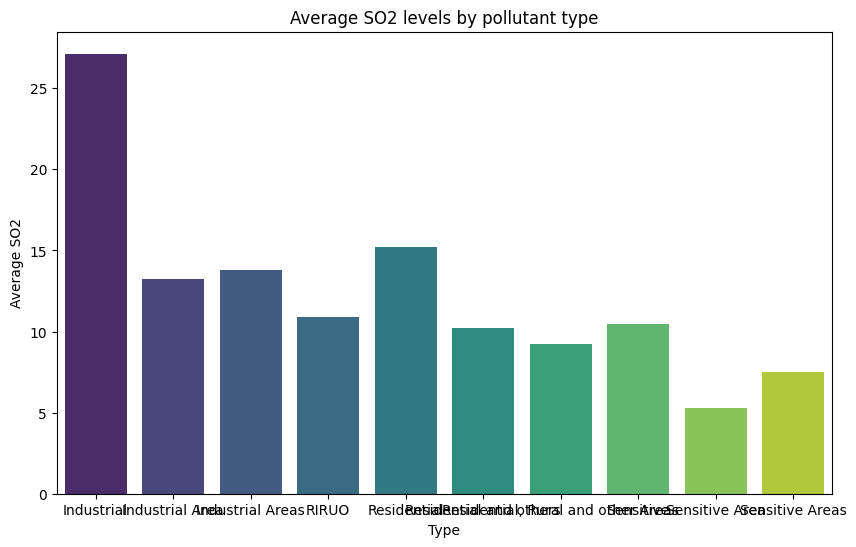

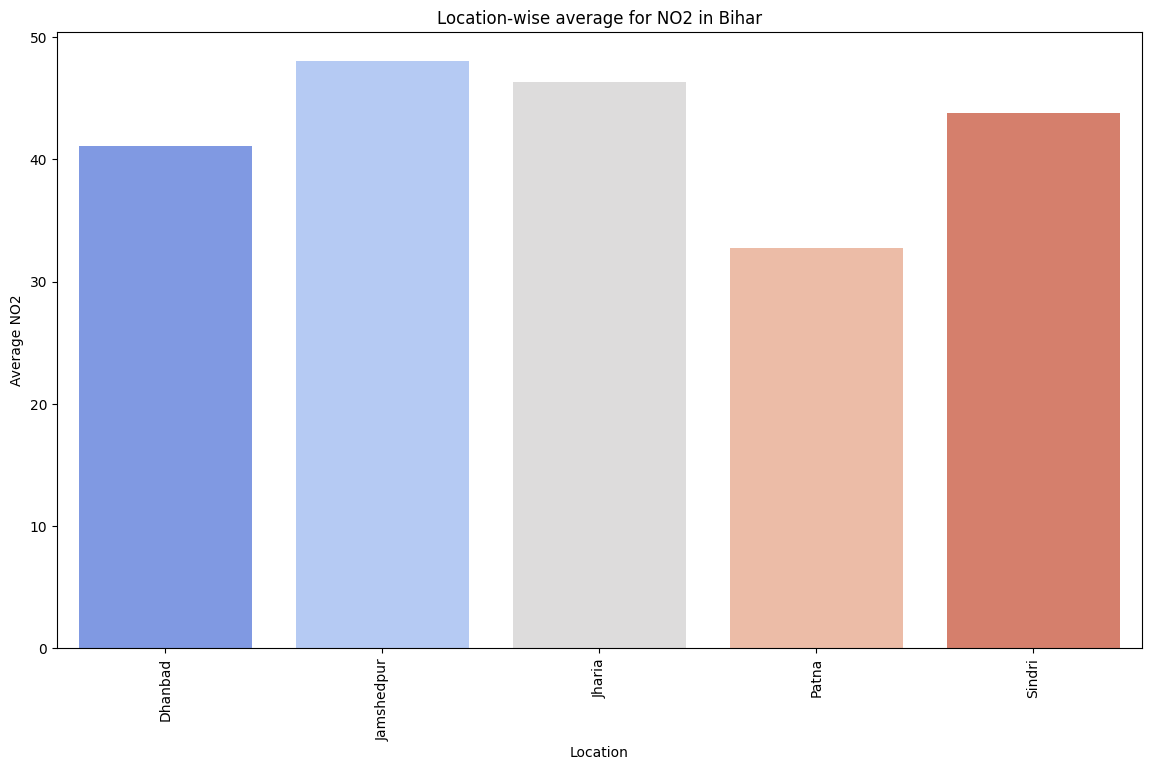

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Columns in your data that contain pollutant values
VALUE_COLS = ['so2', 'no2', 'rspm', 'spm', 'pm2_5']

# Load your dataset (replace 'data.csv' with your actual data file path)
data = pd.read_csv("./datasets/data.csv", encoding="cp1252") 

# Ensure 'type' and 'date' columns are in the dataset; otherwise, handle their absence accordingly
if 'type' not in data.columns or 'date' not in data.columns:
    print("Data does not contain 'type' or 'date' columns as expected.")

# Define function to plot average pollutant levels by type
def type_avg(indicator="so2"):
    # Select only numeric columns, then group and calculate the mean
    type_avg = data.groupby("type")[VALUE_COLS].mean()
    if indicator in type_avg.columns:
        plt.figure(figsize=(10, 6))
        sns.barplot(x=type_avg.index, y=type_avg[indicator], palette="viridis")
        plt.xlabel("Type")
        plt.ylabel("Average " + indicator.upper())
        plt.xticks(rotation=0)
        plt.title(f"Average {indicator.upper()} levels by pollutant type")
        plt.show()
    else:
        print(f"Indicator '{indicator}' not found in data columns.")

# Call the function with the desired indicator, e.g., 'so2'
type_avg('so2')

# Define function to plot location-wise average for a given pollutant in a specified state
def location_avgs(state, indicator="so2"):
    # Filter by numeric columns and calculate mean for each location in the specified state
    locs = data.groupby(['state', 'location'])[VALUE_COLS].mean()
    if state in locs.index.get_level_values('state'):
        state_avgs = locs.loc[state].reset_index()
        if indicator in state_avgs.columns:
            plt.figure(figsize=(14, 8))
            sns.barplot(x='location', y=indicator, data=state_avgs, palette="coolwarm")
            plt.xlabel("Location")
            plt.ylabel("Average " + indicator.upper())
            plt.title(f"Location-wise average for {indicator.upper()} in {state}")
            plt.xticks(rotation=90)
            plt.show()
        else:
            print(f"Indicator '{indicator}' not found in data columns.")
    else:
        print(f"State '{state}' not found in data.")

# Call the function with the desired state and indicator, e.g., 'Bihar' and 'no2'
location_avgs("Bihar", "no2")


In [ ]:
# Here's a simplified breakdown of the code concepts:

# ---

# ### 1. **What Is It?**

# This code is designed to analyze and visualize pollution data from a dataset. It calculates and displays the average levels of pollutants like SO2 (Sulfur Dioxide), NO2 (Nitrogen Dioxide), RSPM (Respirable Suspended Particulate Matter), SPM (Suspended Particulate Matter), and PM2.5 (Particulate Matter less than 2.5 micrometers) across different categories (like pollutant type) and regions (like different locations within a state).

# ### 2. **How It Works**

# - **Loading the Data**: The code starts by reading a CSV file containing pollution data into a `DataFrame` (a table-like structure in Python).
# - **Selecting Pollutant Data**: It defines which columns in the data contain pollutant levels, so the calculations focus on just those numbers.
# - **Calculating Averages**:
#   - For **pollutant types**: It groups the data by different types (categories of pollution) and calculates the average level of each pollutant.
#   - For **locations**: It groups the data by state and location, calculating average pollutant levels within each location of a specified state.
# - **Plotting the Data**: After calculations, the code uses graphs to visually show the average levels of a chosen pollutant (e.g., SO2 or NO2) by type or location. This makes it easier to compare pollution levels across different types and regions.
  
# ### 3. **Real-Time Applications**

# - **Environmental Monitoring**: Governments and environmental agencies can use similar code to monitor pollution levels in real-time, adjusting policies based on high pollution areas.
# - **Health and Safety**: Hospitals and public health organizations can analyze pollution data to prepare for possible health effects, such as respiratory issues, in heavily polluted areas.
# - **Urban Planning**: City planners can use pollution data to reduce traffic congestion in areas with high emissions, using real-time insights to improve air quality.

# ---

# This code simplifies the complex task of analyzing pollution data, making it easier to identify trends and high-pollution areas for informed decision-making.